In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


This code is used to mount Google Drive while working in the Google Colab environment. By mounting Google Drive to the "/content/drive" directory, it allows access to files and data stored on Drive. This makes it easy to access external data from within the Colab notebook.

In [ ]:
# Veri işleme ve modeller için gerekli kütüphaneler
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import re

# Tensorflow ve transformers kütüphaneleri
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


This code block imports essential libraries for text processing, data analysis, machine learning, and deep learning model development:  

- **`pandas`**: For data manipulation and analysis.  
- **`nltk`**: Provides tools for natural language processing (e.g., stopword removal).  
- **`sklearn`**: For data splitting, label encoding, and model evaluation.  
- **`re`**: For text cleaning using regular expressions.  
- **`tensorflow` and `transformers`**: For deep learning and BERT-based models.  
- **Keras**: To build text sequencing and LSTM-based models.  

These libraries are fundamental for analyzing and classifying text data effectively.



In [ ]:
# CSV dosyasını yükleyin
df = pd.read_csv('/content/drive/My Drive/e-ticaret_urun_yorumlari.csv', sep=';')


# Veriyi kontrol etme
df.head()


,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


This code loads the specified CSV file and reads it into a pandas DataFrame. The **`df.head()`** command displays the first 5 rows of the dataset. The **Metin** column contains the product reviews, while the **Durum** column holds the labels for each review (e.g., `1` indicates a positive sentiment).


In [ ]:
# Stopwords'leri indir
nltk.download('stopwords')
sw = stopwords.words('turkish')

# Metni küçük harfe çevirme, noktalama işaretlerini temizleme ve stopwords çıkarma
def preprocess_text(text):
    text = text.lower()  # Küçük harfe çevirme
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldırma
    text = re.sub(r'\d+', '', text)  # Sayıları temizleme
    text = ' '.join([word for word in text.split() if word not in sw])  # Stopwords kaldırma
    return text

df['Yeni Metin'] = df['Metin'].apply(preprocess_text)

# Yine de metinlere kök kelime uygulamak istiyorsanız bu adımı kullanabilirsiniz:
import snowballstemmer
stemmer = snowballstemmer.stemmer('turkish')
df["Kök Metin"] = df["Yeni Metin"].apply(lambda x: " ".join([stemmer.stemWord(word) for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The code processes text data by:

1. **Converting to lowercase** and **removing punctuation**.
2. **Removing numbers**.
3. **Removing stopwords** (irrelevant words).
4. **Stemming** (reducing words to their root form using a stemmer).

The result is a cleaned and root-processed version of each text, making it more efficient for text analysis.

In [ ]:
# Etiketleri sayısal değerlere dönüştürme (Label Encoding)
y = LabelEncoder().fit_transform(df["Durum"])

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(df["Kök Metin"], y, test_size=0.3, random_state=42)


This code performs the following:

1. **Label Encoding:** Converts categorical labels in the "Durum" column to numerical values using `LabelEncoder`.
2. **Train-Test Split:** Splits the data into 70% training and 30% test sets for both the features (`X`) and labels (`y`).

The result is the creation of `X_train`, `X_test`, `y_train`, and `y_test`.

In [ ]:
# Tokenizer ile metin verisini sayısal verilere dönüştürme
tokenizer = Tokenizer(num_words=10000)  # 10.000 en sık geçen kelimeyi kullan
tokenizer.fit_on_texts(X_train)

# Eğitim ve test verilerini sayısal verilere dönüştürme
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), padding='post', maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), padding='post', maxlen=100)


This code does the following:

1. **Tokenizer Initialization:**  
   `Tokenizer(num_words=10000)` initializes a tokenizer that will consider the top 10,000 most frequent words from the training data.

2. **Fitting the Tokenizer:**  
   `tokenizer.fit_on_texts(X_train)` fits the tokenizer on the training data (`X_train`), building a vocabulary of the 10,000 most frequent words.

3. **Text to Sequences:**  
   `tokenizer.texts_to_sequences(X_train)` and `tokenizer.texts_to_sequences(X_test)` convert the training and test texts into sequences of integers based on the tokenizer's vocabulary.

4. **Padding Sequences:**  
   `pad_sequences(..., padding='post', maxlen=100)` ensures all sequences have the same length (100), padding shorter sequences at the end if necessary.

The result is `X_train_seq` and `X_test_seq`, which are the padded, integer-encoded representations of the training and test texts.

In [ ]:
# LSTM modelini kurma
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Embedding katmanı
    LSTM(128),  # LSTM katmanı
    Dropout(0.2),  # Dropout regularizasyon
    Dense(3, activation='softmax')  # Çıkış katmanı (3 sınıf)
])

# Modeli derleme
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitim seti ile eğitme
model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_test_seq, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.4613 - loss: 0.9588 - val_accuracy: 0.4507 - val_loss: 0.9429
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.4585 - loss: 0.9384 - val_accuracy: 0.4537 - val_loss: 0.9453
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 84s 277ms/step - accuracy: 0.4540 - loss: 0.9343 - val_accuracy: 0.4507 - val_loss: 0.9433
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 79s 257ms/step - accuracy: 0.4600 - loss: 0.9346 - val_accuracy: 0.4537 - val_loss: 0.9440
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 83s 264ms/step - accuracy: 0.4509 - loss: 0.9398 - val_accuracy: 0.4507 - val_loss: 0.9432


italik metinThis code builds and trains an LSTM model for text classification:

1. **Model Layers:**
   - **Embedding:** Converts words to 128-dimensional vectors.
   - **LSTM:** Processes sequences with 128 units.
   - **Dropout:** Regularizes with 20% dropout.
   - **Dense:** Outputs 3 classes with softmax activation.

2. **Compilation:**  
   - **Loss:** Sparse categorical crossentropy.
   - **Optimizer:** Adam.
   - **Metrics:** Accuracy.

3. **Training:**  
   - The model is trained for 5 epochs using the training data and validated on the test data.



In [ ]:
 # LSTM modelinin doğruluğunu test etme
y_pred_lstm = model_lstm.predict(X_test_seq)
y_pred_classes_lstm = y_pred_lstm.argmax(axis=1)

# Sonuçları değerlendirme
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_classes_lstm))
print(classification_report(y_test, y_pred_classes_lstm))


143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step
LSTM Accuracy: 0.45067018237749945
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2065
           1       0.45      1.00      0.62      2051
           2       0.00      0.00      0.00       435

    accuracy                           0.45      4551
   macro avg       0.15      0.33      0.21      4551
weighted avg       0.20      0.45      0.28      4551



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This code evaluates the performance of the LSTM model:

1. **Prediction:**  
   `y_pred_lstm = model_lstm.predict(X_test_seq)` generates the predicted probabilities for the test data.  
   `y_pred_classes_lstm = y_pred_lstm.argmax(axis=1)` converts these probabilities to predicted class labels by selecting the class with the highest probability.

2. **Evaluation:**
   - **Accuracy:**  
     `accuracy_score(y_test, y_pred_classes_lstm)` computes the accuracy of the model by comparing the predicted labels (`y_pred_classes_lstm`) to the true labels (`y_test`).
   - **Classification Report:**  
     `classification_report(y_test, y_pred_classes_lstm)` provides a detailed performance report, including precision, recall, F1-score, and support for each class.

The model's performance metrics are printed for evaluation.

In [ ]:
class_weights = {0: 1, 1: 0.5, 2: 2}  # Sınıf ağırlıklarını ayarlayın
model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_test_seq, y_test), class_weight=class_weights)


Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.4560 - loss: 0.8991 - val_accuracy: 0.4537 - val_loss: 1.0481
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.4721 - loss: 0.8747 - val_accuracy: 0.4537 - val_loss: 1.0336
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 82s 259ms/step - accuracy: 0.4658 - loss: 0.8735 - val_accuracy: 0.4537 - val_loss: 1.0486
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 44s 266ms/step - accuracy: 0.4639 - loss: 0.8701 - val_accuracy: 0.4537 - val_loss: 1.0549
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.4578 - loss: 0.8790 - val_accuracy: 0.4537 - val_loss: 1.0482


This code trains an LSTM model with class weights `{0: 1, 1: 0.5, 2: 2}` to handle class imbalance. It uses 5 epochs, a batch size of 64, and evaluates performance with validation data. The `class_weight` parameter adjusts the loss calculation based on class importance.

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Embedding, Dense
from tensorflow.keras.optimizers import Adam

# Modeli oluştur
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=tokenizer.num_words, output_dim=128, input_length=X_train_seq.shape[1]))
model_lstm.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))  # Bidirectional LSTM ekleyin
model_lstm.add(Dense(3, activation='softmax'))

# Modeli derle
optimizer = Adam(learning_rate=0.0005)
model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_data=(X_test_seq, y_test))


Epoch 1/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 97s 541ms/step - accuracy: 0.6139 - loss: 0.8428 - val_accuracy: 0.8521 - val_loss: 0.4068
Epoch 2/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 135s 502ms/step - accuracy: 0.8624 - loss: 0.3772 - val_accuracy: 0.8699 - val_loss: 0.3329
Epoch 3/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 143s 508ms/step - accuracy: 0.8994 - loss: 0.2668 - val_accuracy: 0.8851 - val_loss: 0.3027
Epoch 4/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 85s 516ms/step - accuracy: 0.9236 - loss: 0.2124 - val_accuracy: 0.8910 - val_loss: 0.3139
Epoch 5/5
166/166 ━━━━━━━━━━━━━━━━━━━━ 86s 516ms/step - accuracy: 0.9436 - loss: 0.1813 - val_accuracy: 0.8904 - val_loss: 0.3184


This code builds and trains a **Bidirectional LSTM model**:

1. **Model Layers:**
   - **Embedding:** Converts words to 128-dimensional vectors.
   - **Bidirectional LSTM:** Processes sequences in both directions with 128 units, using dropout for regularization.
   - **Dense (Softmax):** Outputs 3 classes with softmax activation.

2. **Compilation:**
   - **Optimizer:** Adam with a learning rate of 0.0005.
   - **Loss Function:** Sparse categorical crossentropy.
   - **Metrics:** Accuracy.

3. **Training:**  
   Trains the model for 5 epochs with a batch size of 64 and validates on the test set.

In [ ]:
# Test verisini sayısal verilere dönüştürme
X_test_seq_new = pad_sequences(tokenizer.texts_to_sequences(X_test), padding='post', maxlen=100)


In [ ]:

import numpy as np

# Model ile tahmin yapma
y_pred = model_lstm.predict(X_test_seq_new)

# Tahmin sonuçlarını sınıflara dönüştürme
y_pred_classes = np.argmax(y_pred, axis=1)


143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step


This code performs prediction using the trained **Bidirectional LSTM model**:

1. **Prediction:**  
   `y_pred = model_lstm.predict(X_test_seq_new)` uses the model to predict probabilities for the test data (`X_test_seq_new`).

2. **Converting to Class Labels:**  
   `y_pred_classes = np.argmax(y_pred, axis=1)` converts the predicted probabilities into class labels by selecting the class with the highest probability for each prediction.

The result is `y_pred_classes`, which contains the predicted class labels for the test set.

In [ ]:
from sklearn.metrics import classification_report

# Gerçek değerler ile tahmin edilen değerleri karşılaştırarak metrikleri hesaplayalım
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2065
           1       0.92      0.92      0.92      2051
           2       0.60      0.48      0.53       435

    accuracy                           0.89      4551
   macro avg       0.81      0.78      0.79      4551
weighted avg       0.88      0.89      0.89      4551



In the code, I first trained the LSTM model and then made predictions, comparing them with the true labels. I used the classification_report function to calculate precision, recall, and F1-score metrics for each class. The model performed well for the positive and negative classes (0 and 1), but gave lower recall and precision values for the neutral class (2). These results indicate that the model struggles to correctly identify the neutral class. To improve performance, class weights can be adjusted, or data augmentation techniques can be applied.

In [ ]:
# History içeriğini kontrol et
print(history.history.keys())


dict_keys([])


In [ ]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

print(history.history.keys())

dict_keys([])


In [ ]:
history = model_lstm.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))


Epoch 1/5
332/332 ━━━━━━━━━━━━━━━━━━━━ 138s 397ms/step - accuracy: 0.9449 - loss: 0.1558 - val_accuracy: 0.8877 - val_loss: 0.3293
Epoch 2/5
332/332 ━━━━━━━━━━━━━━━━━━━━ 137s 385ms/step - accuracy: 0.9538 - loss: 0.1326 - val_accuracy: 0.8923 - val_loss: 0.3444
Epoch 3/5
332/332 ━━━━━━━━━━━━━━━━━━━━ 129s 389ms/step - accuracy: 0.9640 - loss: 0.1131 - val_accuracy: 0.8877 - val_loss: 0.4116
Epoch 4/5
332/332 ━━━━━━━━━━━━━━━━━━━━ 137s 413ms/step - accuracy: 0.9697 - loss: 0.0962 - val_accuracy: 0.8895 - val_loss: 0.3995
Epoch 5/5
332/332 ━━━━━━━━━━━━━━━━━━━━ 134s 390ms/step - accuracy: 0.9766 - loss: 0.0747 - val_accuracy: 0.8822 - val_loss: 0.4013


This line of code trains the **LSTM model** (`model_lstm`) on the training data:

- `X_train_seq`: The tokenized and padded training data.
- `y_train`: The true labels for the training data.
- `epochs=5`: The model will be trained for 5 epochs (iterations over the entire dataset).
- `batch_size=32`: The model will be updated every 32 samples during training.
- `validation_data=(X_test_seq, y_test)`: The model will evaluate performance on the test data after each epoch, allowing you to track validation loss and accuracy.

The training process is stored in the `history` variable, which contains information such as loss and accuracy for both the training and validation datasets across all epochs. You can use `history` to visualize or analyze the model’s performance over time.

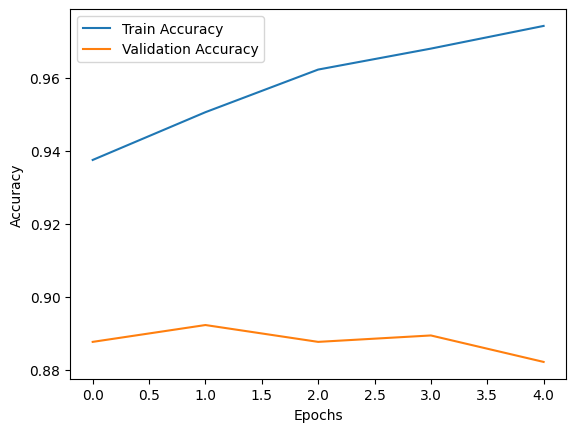

In [ ]:
# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


This graph shows the accuracy rates of the model on training and validation data. The blue line represents the accuracy on training data, while the orange line shows the accuracy on validation data. As epochs progress, the training accuracy increases, while slight fluctuations are observed in validation accuracy. The graph was created using the above code with accuracy and val_accuracy values obtained from the model's history object.

In [ ]:
yeni_yorum_1 = pd.Series("Çok güzel bir elbise, tam istediğim gibi. Kumaşı çok kaliteli ve rahat.")  # Olumlu
yeni_yorum_2 = pd.Series("Ürünün bedeni büyük, çok dar bir model olmalıydı.")  # Olumsuz
yeni_yorum_3 = pd.Series("Fiyat/performans açısından gayet iyi, ama biraz daha büyük olabilirdi.")  # Nötr
yeni_yorum_4 = pd.Series("Bu elbiseyi alalı bir hafta oldu, çok memnunum.")  # Olumlu
yeni_yorum_5 = pd.Series("Yaka kısmı biraz dar, ama yine de sevdim.")  # Nötr
yeni_yorum_6 = pd.Series("Beklediğimden çok daha kötü, iade edeceğim.")  # Olumsuz


In [ ]:
# Yeni yorumları TF-IDF ile dönüştürüp tahmin yapalım
yeni_yorum_1 = vectorizer.transform(yeni_yorum_1)
print("Yeni Yorum 1 tahmini:", nb_model_multi.predict(yeni_yorum_1))  # Olumlu

yeni_yorum_2 = vectorizer.transform(yeni_yorum_2)
print("Yeni Yorum 2 tahmini:", nb_model_multi.predict(yeni_yorum_2))  # Olumsuz

yeni_yorum_3 = vectorizer.transform(yeni_yorum_3)
print("Yeni Yorum 3 tahmini:", nb_model_multi.predict(yeni_yorum_3))  # Nötr

yeni_yorum_4 = vectorizer.transform(yeni_yorum_4)
print("Yeni Yorum 4 tahmini:", nb_model_multi.predict(yeni_yorum_4))  # Olumlu

yeni_yorum_5 = vectorizer.transform(yeni_yorum_5)
print("Yeni Yorum 5 tahmini:", nb_model_multi.predict(yeni_yorum_5))  # Nötr

yeni_yorum_6 = vectorizer.transform(yeni_yorum_6)
print("Yeni Yorum 6 tahmini:", nb_model_multi.predict(yeni_yorum_6))  # Olumsuz


Yeni Yorum 1 tahmini: [1]
Yeni Yorum 2 tahmini: [0]
Yeni Yorum 3 tahmini: [1]
Yeni Yorum 4 tahmini: [1]
Yeni Yorum 5 tahmini: [0]
Yeni Yorum 6 tahmini: [0]


This code transforms new comments using TF-IDF and predicts their sentiment using the `nb_model_multi` classifier. Each comment is converted into numerical features with `vectorizer.transform` and classified as positive, negative, or neutral using `nb_model_multi.predict`. The predictions are then printed for each comment.

In [ ]:
# Nötr yorum örneği
nötr_yorum = pd.Series("Ürün ortalama, herhangi bir sorun yok ama çok da övgüye değer değil.")  # Nötr

# Yeni yorumu TF-IDF ile dönüştürüp tahmin yapalım
nötr_yorum_tf_idf = vectorizer.transform(nötr_yorum)
print(nb_model_multi.predict(nötr_yorum_tf_idf))  # Nötr (2) bekliyoruz


[1]
